In [10]:
from glob import glob
import awkward as ak
import uproot
import numpy as np
from coffea import util
import torch
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
cmap = cm.get_cmap("viridis")
import fast_histogram
%matplotlib inline

In [17]:
j = torch.randn(256, 4, 4)

mean = 1 * torch.ones(j[:,0,:].shape)
std = 1 * torch.ones(j[:,0,:].shape)

j[:, 0, :] = torch.normal(160 * mean, 60 * std)
j[:, 1, :] = torch.normal(0 * torch.ones(j[:,0,:].shape), std)
j[:, 2, :] = torch.normal(0 * torch.ones(j[:,0,:].shape), std)
j[:, 3, :] = torch.normal(0 * torch.ones(j[:,0,:].shape), .001 * std)


rec_j = torch.randn(256, 4, 4)

mean = 1 * torch.ones(rec_j[:,0,:].shape)
std = 1 * torch.ones(rec_j[:,0,:].shape)

rec_j[:, 0, :] = torch.normal(160 * mean, 60 * std) + 100
rec_j[:, 1, :] = torch.normal(0 * torch.ones(rec_j[:,0,:].shape), std)
rec_j[:, 2, :] = torch.normal(0 * torch.ones(rec_j[:,0,:].shape), std)
rec_j[:, 3, :] = torch.normal(0 * torch.ones(rec_j[:,0,:].shape), .001 * std)

true_val = j[:10,:,:]
reco_val = rec_j[:10,:,:]

In [32]:
print(true_val[0])
print(reco_val[0])

tensor([[ 1.4138e+02,  1.1892e+02,  1.4855e+02,  2.5747e+02],
        [ 3.8466e-01,  1.2229e+00,  1.3067e-01,  5.5980e-01],
        [-1.2914e+00, -6.0785e-01,  4.5954e-02,  1.1284e+00],
        [-4.8548e-04, -1.0789e-04,  1.3767e-03,  6.3921e-04]])
tensor([[ 1.9383e+02,  3.1917e+02,  2.3618e+02,  1.9135e+02],
        [ 4.8484e-01, -7.2967e-01, -3.0202e-01,  5.7971e-01],
        [ 3.2694e-01, -1.1474e-01, -1.0430e+00,  1.1388e+00],
        [-1.7047e-03, -6.4325e-04,  1.2650e-03,  3.0964e-04]])


(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([118.92427063, 120.3097374 , 121.69520416, 123.08067093,
        124.4661377 , 125.85160446, 127.23707123, 128.62253799,
        130.00800476, 131.39347153, 132.77893829, 134.16440506,
        135.54987183, 136.93533859, 138.32080536, 139.70627213,
        141.09173889, 142.47720566, 143.86267242, 145.24813919,
        146.63360596, 148.01907272, 149.40453949, 150.79000626,
        152.17547302, 153.56093979, 154.94640656, 156.33187332,
        157.71734009, 159.10280685, 160.48827362, 161.87374039,
        163.25920715, 164.64467392, 166.03014069, 167.41560745,
        168.80107422, 170.18654099, 171.57200775, 172.95747452,
        174.34294128, 175.72840805, 177.11387482, 178.49934158,
        179.88480835, 181.27027512, 182.6557418

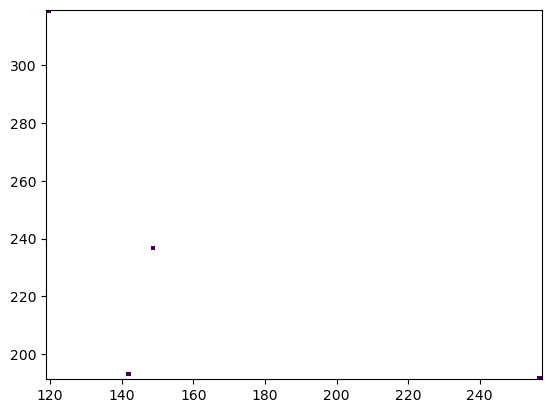

In [33]:
i = 0
plt.hist2d(true_val[0, i, :].flatten().numpy(), reco_val[0, i, :].flatten().numpy(), cmap=cmap, norm = matplotlib.colors.LogNorm(vmax = 500), bins = 100)

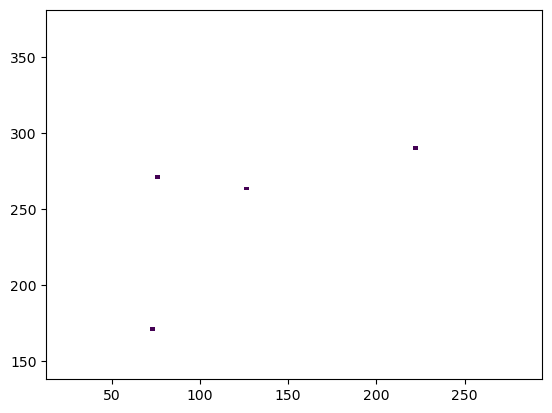

In [34]:
bounds = [(true_val[:, i, :].min(), true_val[:, i, :].max()), (reco_val[:, i, :].min(), reco_val[:, i, :].max())]
h = fast_histogram.histogram2d(true_val[0, i, :], reco_val[0, i, :], range=bounds, bins=100) # get the histogram of the i-th feature for all the events and all the true_valets
plt.imshow(h, cmap=cmap, norm = matplotlib.colors.LogNorm(vmax = 500), extent= [*bounds[0], *bounds[1]], aspect = 'auto')